<a href="https://colab.research.google.com/github/Shashank-gc/info5731/blob/master/ghanta_selfstudy12_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
!wget https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv

--2019-04-23 08:19:28--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv’

customer_churn.csv  100%[===================>] 668.81K  --.-KB/s    in 0.02s   

2019-04-23 08:19:28 (36.7 MB/s) - ‘customer_churn.csv’ saved [684858/684858]



In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('customer_churn.csv')

In [206]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [207]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

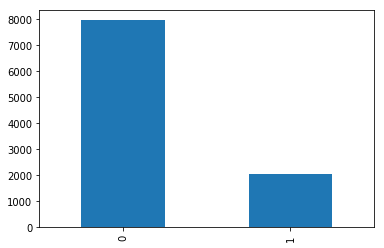

In [208]:
df['Exited'].value_counts().plot(kind='bar')

**From the above plot and value count we can see that the size of '0' & '1' are not equal. So we cannot build an accurate model with this type of data so we need to balance the count of '0' & 1's **

In [0]:
count_0, count_1 = df.Exited.value_counts()
df0=df[df['Exited'] == 0]
df1=df[df['Exited'] == 1]

In [210]:
count_0, count_1

(7963, 2037)

In [0]:
exit1count=len(df1)

In [0]:
df0_samp=df0.sample(n=exit1count)
unisamp=df0_samp.append(df1, ignore_index=True)
unisamp.drop(['RowNumber'], axis=1, inplace=True)

In [213]:
len(df0_samp)

2037

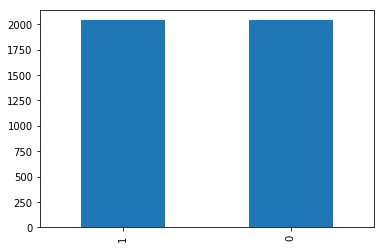

In [214]:
unisamp['Exited'].value_counts().plot(kind='bar')

**Here the value counts of the same are at same level**

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split

In [219]:
df=unisamp
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15694404,Eberegbulam,781,France,Female,42,3,156555.54,1,1,1,175674.01,0
1,15676909,Mishin,667,Spain,Female,34,5,0.00,2,1,0,163830.64,0
2,15645621,Hunter,811,Spain,Male,44,3,0.00,2,0,1,78439.73,0
3,15570417,Chien,579,France,Male,35,1,0.00,2,1,0,4460.20,0
4,15641640,Uspenskaya,545,Spain,Female,33,7,173331.52,1,1,0,150452.88,0


**In the above data we have variables with different scales so the machine may not be able to detect a relationship between them. So to avoid this iisue we will convert all the reading into a common scale.**

In [220]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[numeric_columns] = sc.fit_transform(df[numeric_columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [221]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15694404,Eberegbulam,1.353381,France,Female,0.082882,-0.664930,1.232010,-0.774659,1,1,1.283764,0
1,15676909,Mishin,0.194952,Spain,Female,-0.679547,0.022004,-1.310039,0.715407,1,0,1.079032,0
2,15645621,Hunter,1.658230,Spain,Male,0.273489,-0.664930,-1.310039,0.715407,0,1,-0.397086,0
3,15570417,Chien,-0.699273,France,Male,-0.584243,-1.351865,-1.310039,0.715407,1,0,-1.675941,0
4,15641640,Uspenskaya,-1.044770,Spain,Female,-0.774850,0.708939,1.504408,-0.774659,1,0,0.847776,0


In [0]:
train, test = train_test_split(df, test_size=0.20, random_state = 1)

In [223]:
len(train)

3259

In [224]:
len(test)

815

In [0]:
train, valid = train_test_split(train, test_size=0.20, random_state = 1)

In [226]:
valid.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3683,15772482,Iloerika,1.841140,Germany,Male,-1.251368,-0.664930,0.839878,2.205473,1,0,0.060135,1
2112,15661629,Ricci,-1.278488,Spain,Male,-0.679547,1.395873,0.742953,-0.774659,1,0,1.259122,1
3746,15777060,Olszewski,1.241602,France,Female,-0.774850,-0.321463,-1.310039,-0.774659,1,0,-1.302199,1
619,15760849,Nwachukwu,-1.126063,France,Male,-0.203029,-1.008398,-1.310039,0.715407,1,1,0.626486,0
618,15736963,Herring,-0.252161,France,Male,0.178185,-1.351865,-1.310039,0.715407,1,1,0.777358,0


In [0]:
from tensorflow import feature_column

In [0]:
tf.random.set_seed(1)

In [0]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [0]:
feature_columns=[]

In [0]:
for header in numeric_columns:
  feature_columns.append(feature_column.numeric_column(header))

In [232]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
def get_one_hot_rom_categorical(colname):
  categorical = feature_column.categorical_column_with_vocabulary_list(
  colname,
  train[colname].unique().tolist())
  return feature_column.indicator_column(categorical)

In [234]:
get_one_hot_rom_categorical("Geography")

IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('France', 'Spain', 'Germany'), dtype=tf.string, default_value=-1, num_oov_buckets=0))

In [0]:
for col in categorical_columns:
  feature_columns.append(get_one_hot_rom_categorical(col))

In [236]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('France', 'Spain', 'Germany'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(c

In [0]:
from tensorflow.keras import layers

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [239]:
feature_layer

In [0]:
model = keras.Sequential()
model.add(feature_layer)
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
def df_to_tfdata(df, shuffle=True, bs=32):
  df = df.copy()
  labels = df.pop('Exited')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df), seed=1)
  ds = ds.batch(bs)
  return ds

In [0]:
train_ds = df_to_tfdata(train)

In [0]:
valid_ds = df_to_tfdata(valid, shuffle=False)
test_ds = df_to_tfdata(test, shuffle=False)

In [245]:
model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 20ms/step - loss: 0.5837 - accuracy: 0.6617 - val_loss: 0.5262 - val_accuracy: 0.7316
Epoch 2/5
82/82 [==============================] - 1s 18ms/step - loss: 0.5106 - accuracy: 0.7454 - val_loss: 0.4911 - val_accuracy: 0.7515
Epoch 3/5
82/82 [==============================] - 1s 18ms/step - loss: 0.4775 - accuracy: 0.7645 - val_loss: 0.4814 - val_accuracy: 0.7546
Epoch 4/5
82/82 [==============================] - 1s 18ms/step - loss: 0.4638 - accuracy: 0.7690 - val_loss: 0.4805 - val_accuracy: 0.7531
Epoch 5/5
82/82 [==============================] - 2s 18ms/step - loss: 0.4555 - accuracy: 0.7739 - val_loss: 0.4812 - val_accuracy: 0.7577


In [246]:
model.evaluate(test_ds)

26/26 [==============================] - 0s 10ms/step - loss: 0.4362 - accuracy: 0.8012


[0.43620057518665606, 0.801227]